- In this project, we will perform basic Exploratory Data Analysis (EDA) on the Kyphosis disease Dataset. 
- Kyphosis is an abnormally excessive convex curvature of the spine. 
- Dataset contains 81 rows and 4 columns representing data on children who have had corrective spinal surgery. 
    - INPUTS: 1. Age: in months, 2. Number: the number of vertebrae involved, 3. Start: the number of the first (topmost) vertebra operated on.
    - OUTPUTS: Kyphosis which represents a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.
- Using the “kyphosis.csv" included in the course package, write a python script to perform the following tasks:
    1. Import the “kyphosis.csv" file using Pandas
    2. Perform basic Exploratory Data Analysis (EDA) on the data       
    3. List the average, minimum and maximum age (in years) considered in this study using 2 methods
    4. Plot the correlation matrix 
    5. Convert the age column datatype from int64 to float64
    6. Define a function that converts age from months to years 
    7. Apply the function to the “Age” column and add the results into a new column entitled “Age in Years” 
    8. What are the features of the oldest and youngest child in this study?
    9. Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check.    
    10. Normalization is conducted on the 'Age' column to make feature values range from 0 to 1.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

 1. Import the “kyphosis.csv" file using Pandas

In [2]:
kyp = pd.read_csv('kyphosis.csv')

 2. Perform basic Exploratory Data Analysis (EDA) on the data 

In [3]:
print(f"This data has {kyp.shape[1]} variables, {kyp.shape[0]} observations, in total {kyp.size} data present and {kyp.isnull().sum().sum()} Null values.")

This data has 4 variables, 81 observations, in total 324 data present and 0 Null values.


In [4]:
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
kyp.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [6]:
kyp.sample(5)

,Kyphosis,Age,Number,Start
8,absent,113,2,16
72,absent,87,4,16
74,absent,11,3,15
58,absent,51,7,9
30,absent,31,3,16


In [7]:
# Print summary of the dataframe. No empty data
kyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [8]:
# Statistical details
kyp.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


In [9]:
print(f"Max age is {kyp.Age.max()}, min age is {kyp.Age.min()} and average age is {kyp.Age.mean()} in months")

Max age is 206, min age is 1 and average age is 83.65432098765432 in months


In [10]:
kyp.Age.sort_values(ascending=False).head(1)

73    206
Name: Age, dtype: int64

In [11]:
kyp.Age.sort_values(ascending=False).tail(1)

4    1
Name: Age, dtype: int64

In [12]:
kyp.Age.sort_values(ascending=False).mean()

83.65432098765432

In [13]:
corr = kyp.corr(numeric_only=True)

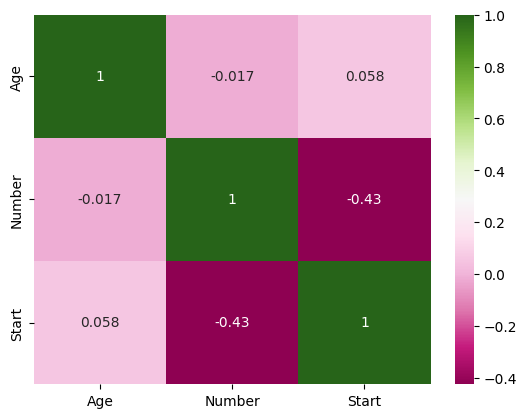

In [14]:
sns.heatmap(corr, annot = True, cmap="PiYG");

5. Convert the age column datatype from int64 to float64

In [15]:
kyp.Age=kyp.Age.astype('float64')

In [16]:
kyp.dtypes

Kyphosis     object
Age         float64
Number        int64
Start         int64
dtype: object

6. Define a function that converts age from months to years

In [17]:
def month_to_years(months):
    return round(months / 12, 2)

7. Apply the function to the “Age” column and add the results into a new column entitled “Age in Years” 

In [18]:
kyp['age_in_years'] = kyp["Age"].apply(month_to_years)

8. What are the features of the oldest and youngest child in this study?

In [19]:
kyp.sort_values(by='Age').head(1)

,Kyphosis,Age,Number,Start,age_in_years
36,absent,1.0,3,9,0.08


In [20]:
kyp.sort_values(by='Age').tail(1)

,Kyphosis,Age,Number,Start,age_in_years
73,absent,206.0,4,10,17.17


9. Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check. 

In [21]:
kyp.groupby('Kyphosis')['Age'].mean()

Kyphosis
absent     79.890625
present    97.823529
Name: Age, dtype: float64

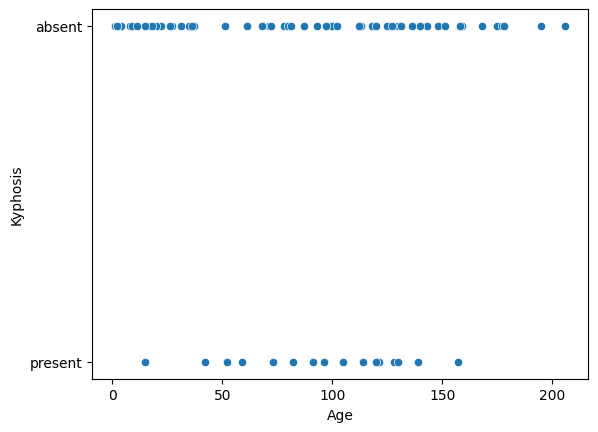

In [22]:
sns.scatterplot(x = "Age", y='Kyphosis', data = kyp);

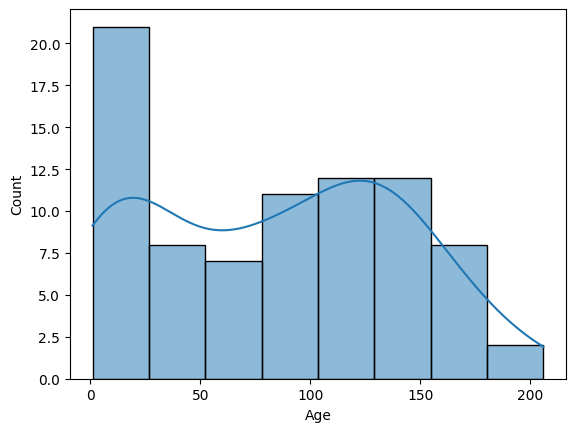

In [23]:
sns.histplot(x = "Age", data = kyp, kde = True);

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
kyp['Age'] = scaler.fit_transform(kyp['Age'].values.reshape(-1,1))

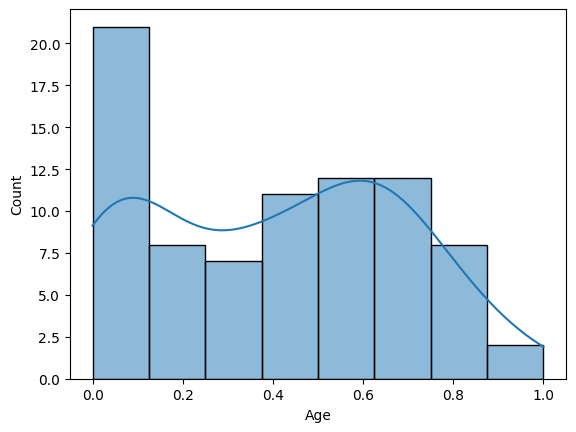

In [25]:
sns.histplot(x = "Age", data = kyp, kde = True);

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kyp['Age1'] = scaler.fit_transform(kyp['Age'].values.reshape(-1,1))

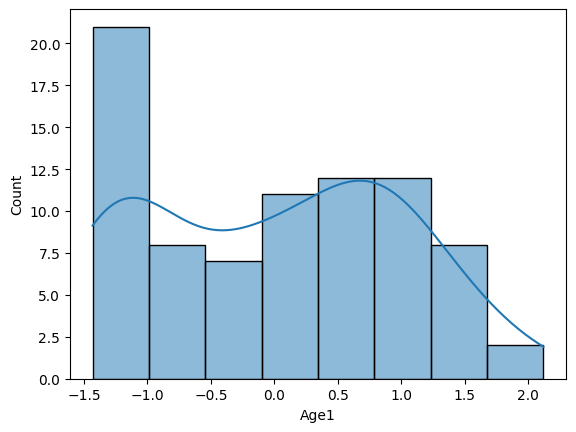

In [27]:
sns.histplot(x = "Age1", data = kyp, kde = True);

In [28]:
kyp[kyp.Age1 < 0].count()

Kyphosis        40
Age             40
Number          40
Start           40
age_in_years    40
Age1            40
dtype: int64

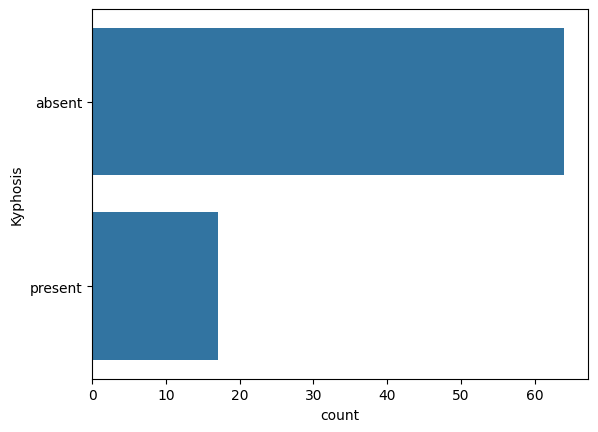

In [29]:
# Count Patients - 64 absent with no kyphosis after operation and 18 preset with the disease after surgery 
sns.countplot(kyp['Kyphosis'], label = 'Count');

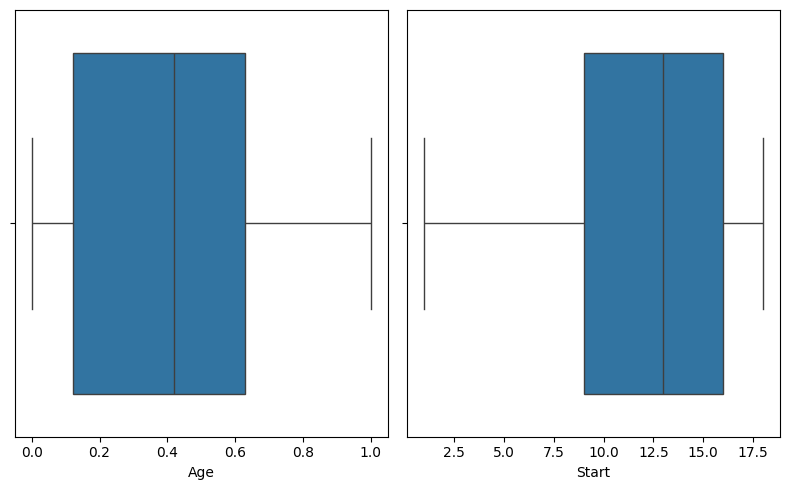

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(8,5))

sns.boxplot(x = "Age", data = kyp, ax=ax[0]);
sns.boxplot(x = "Start", data = kyp, ax=ax[1]);

plt.tight_layout()
plt.show()



In [31]:

from sklearn.preprocessing import LabelEncoder

# Instantiate an object out of our class 
LE= LabelEncoder()

# Replace Kyphosis column ("absent and present") into 0 and 1. Take the object and apply fit transform method to our column
kyp['Kyphosis'] = LE.fit_transform(kyp['Kyphosis'])

In [32]:
kyp.head()

,Kyphosis,Age,Number,Start,age_in_years,Age1
0,0,0.341463,3,5,5.92,-0.219143
1,0,0.765854,3,14,13.17,1.287494
2,1,0.619512,4,5,10.67,0.767964
3,0,0.004878,5,1,0.17,-1.414063
4,0,0.000000,4,15,0.08,-1.431381


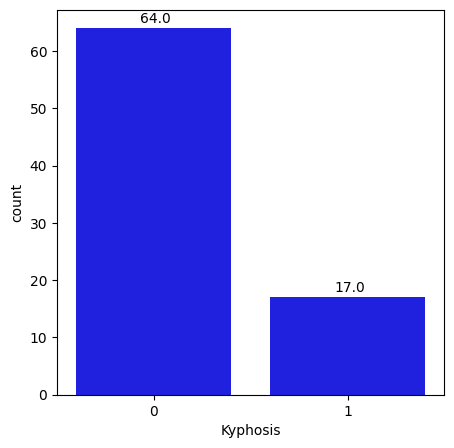

In [33]:
fig, ax = plt.subplots(figsize = (5, 5))

ax_tip = sns.countplot(data = kyp, x = "Kyphosis", color='blue')

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.33, p.get_height()+1))

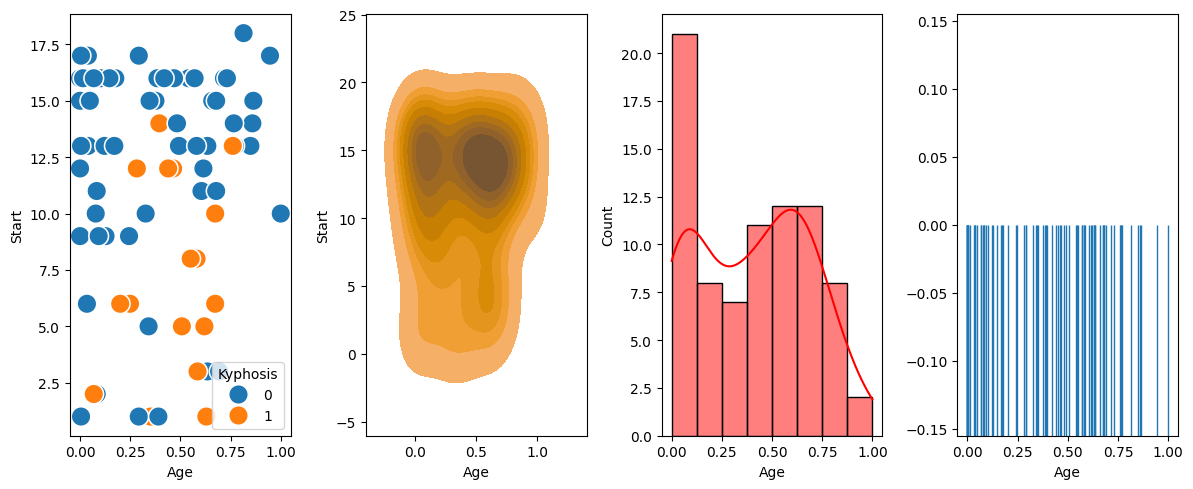

In [34]:
fig, ax = plt.subplots(1, 4, figsize = (12, 5))

sns.scatterplot(x = "Age", y = "Start", data = kyp, s = 200, hue = "Kyphosis", ax=ax[0])
sns.histplot(x = "Age", data = kyp, color='red',kde = True, ax=ax[2])
sns.kdeplot(x = "Age", data = kyp, y = "Start", color='orange', ax=ax[1], fill= True)
sns.rugplot(x = "Age", data = kyp, ax=ax[3],height = 0.5)
plt.tight_layout()

plt.show()

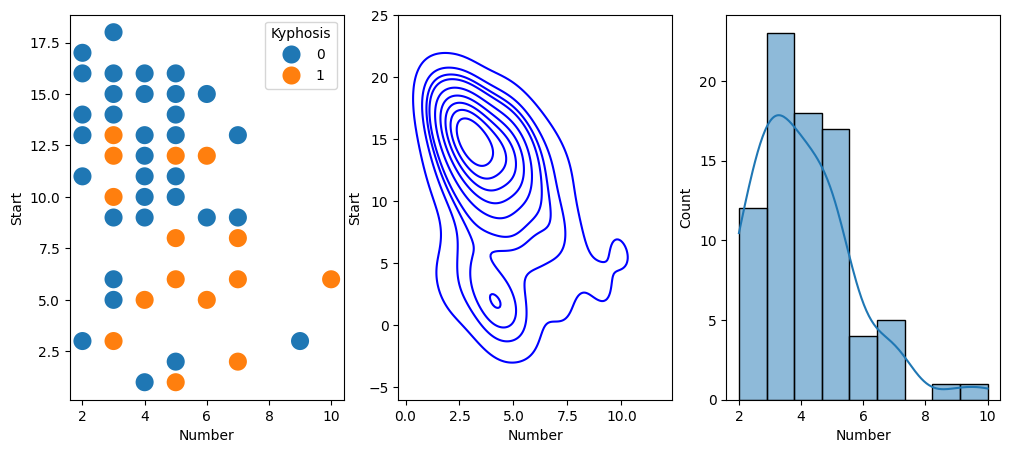

In [35]:
fig, ax = plt.subplots(1, 3, figsize = (12, 5))

sns.scatterplot(x = "Number", y = "Start", data = kyp, s = 200, hue = "Kyphosis", ax=ax[0])
sns.histplot(x = "Number", data = kyp, kde = True, ax=ax[2])
sns.kdeplot(x = "Number", data = kyp, y = "Start", color='blue', ax=ax[1])
plt.show()

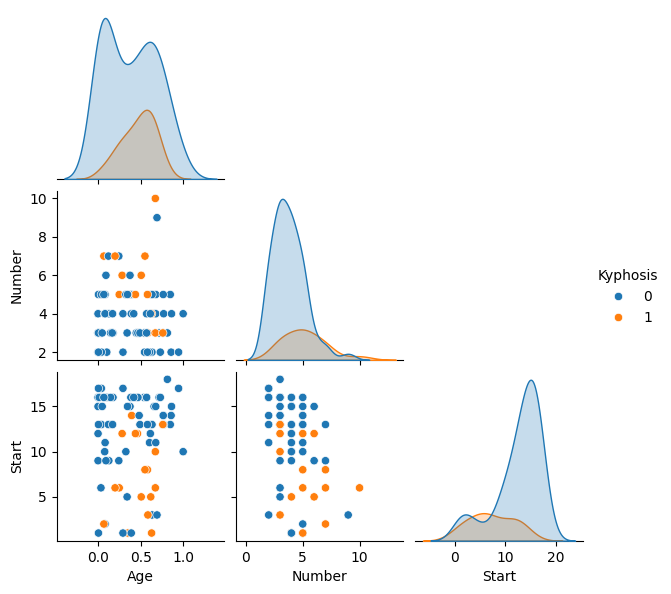

In [36]:
sns.pairplot(kyp, height=2, hue = 'Kyphosis', vars = ['Age', 'Number', 'Start'], corner=True);

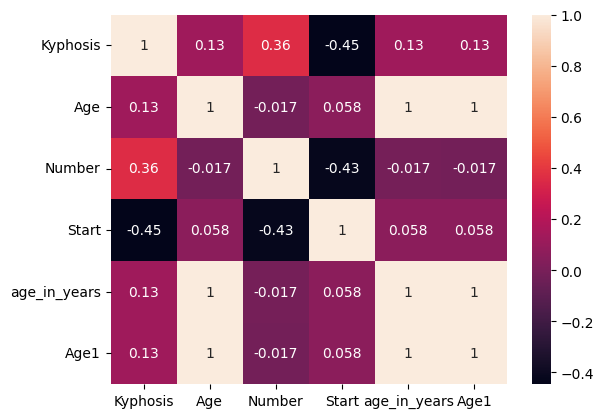

In [37]:
sns.heatmap(kyp.corr(), annot = True);

In [38]:
kyp.groupby('Number')['Kyphosis'].count().sort_values(ascending=False)

Number
3     23
4     18
5     17
2     12
7      5
6      4
9      1
10     1
Name: Kyphosis, dtype: int64

In [39]:
kyp.groupby('Start')['Kyphosis'].count().sort_values(ascending=False)

Start
16    17
13    12
15     7
1      5
12     5
14     5
6      4
9      4
10     4
17     4
3      3
5      3
11     3
2      2
8      2
18     1
Name: Kyphosis, dtype: int64

In [40]:
kyp.groupby('Start')['Kyphosis'].count().sort_values(ascending=False)

Start
16    17
13    12
15     7
1      5
12     5
14     5
6      4
9      4
10     4
17     4
3      3
5      3
11     3
2      2
8      2
18     1
Name: Kyphosis, dtype: int64

# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>This project was supported by</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)